In [2]:
# Imports
import sys
import os
import numpy as np
import pandas as pd
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from numpy import argmax
import seaborn as sns

from imp import reload
import utils
reload(utils)
from utils import*

import matplotlib.pyplot as plt
%matplotlib inline

import mne

from pathlib import Path

In [3]:
working_dir = Path.cwd()
data_dir = working_dir
path = 'User_data/12355/session_2/12355_session_2_03-04-2023_23-43.csv'
csv_file_path = data_dir/path
print(csv_file_path)

/home/niskal/Abhishek/OpenBCI_DataAnlaysis/User_data/12355/session_2/12355_session_2_03-04-2023_23-43.csv


In [16]:
#read the csv file into a pandas dataframe
df = pd.read_csv(csv_file_path)

#get the starting 10 columns corresponding to the 8 channels and the index data
df1 = df.iloc[:,0:10]

#also keep the timestamp, Cognitive Workload and Anxiety column
df1['Timestamp'] = pd.to_datetime(df[' Timestamp (Formatted)'])
df1['Cognitive Workload'] = df['Cognitive_Wokload']
df1['Anxiety'] = df['Anxiety']



#reindex the columns
df1 = df1.reindex(columns=[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
                           ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', 
                           ' EXG Channel 6', ' EXG Channel 7', 'Changed Sample Index',
                           'Sample Index','Timestamp'])


#drop the sample index column
df1 = df1.drop(['Sample Index'], axis=1)

#rename the channels
df1 = df1.rename(columns={' EXG Channel 0': 'eeg1', ' EXG Channel 1': 'eeg2',
                           ' EXG Channel 2': 'eeg3', ' EXG Channel 3': 'eeg4',
                             ' EXG Channel 4': 'eeg5', ' EXG Channel 5': 'eeg6',
                            ' EXG Channel 6': 'eeg7', ' EXG Channel 7': 'eeg8',
                            'Changed Sample Index':'Index'})


#convert dataframe to numpy array
data = df1[['eeg1','eeg2','eeg3','eeg4','eeg5','eeg6','eeg7','eeg8']].to_numpy()

#convert the data to float32
data = data.astype('float32')

# Scaling Data with the scale factor S = (4500000)/4/(2**23-1)
data = data*4500000*4/(2**23-1)

#get transpose of the data
data = data.T


In [17]:
# Create some metadata
n_channels = 8
sampling_freq = 250  # in Hertz
ch_types = ['eeg'] * n_channels
ch_names = ['eeg1', 'eeg2', 'eeg3', 'eeg4', 'eeg5', 'eeg6', 'eeg7', 'eeg8']
info = mne.create_info( ch_names=ch_names, sfreq=sampling_freq,ch_types=ch_types)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: eeg1, eeg2, eeg3, eeg4, eeg5, eeg6, eeg7, eeg8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>


Creating RawArray with float64 data, n_channels=8, n_times=46501
    Range : 0 ... 46500 =      0.000 ...   186.000 secs
Ready.


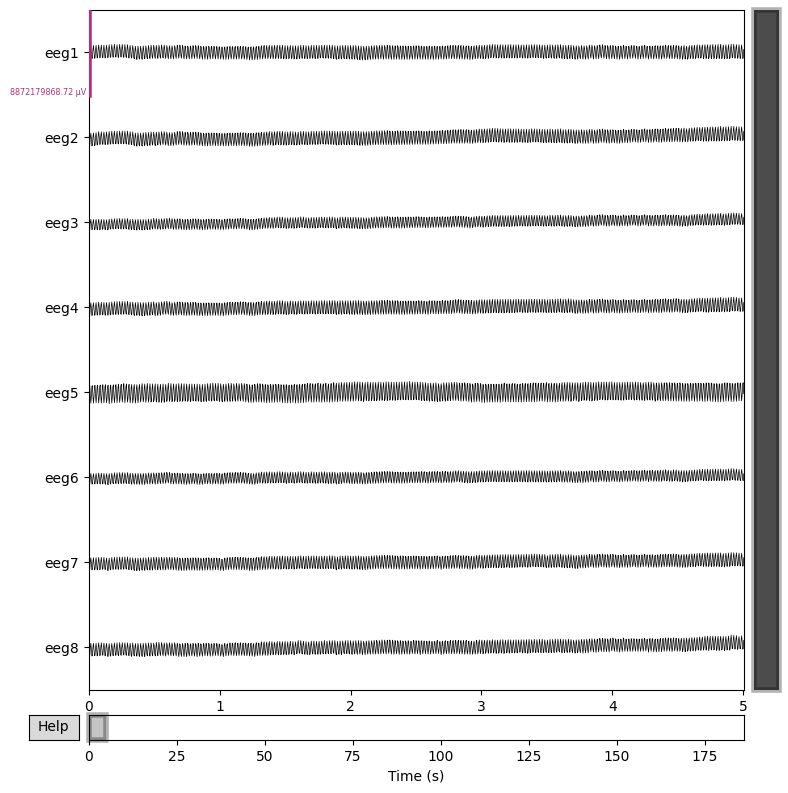

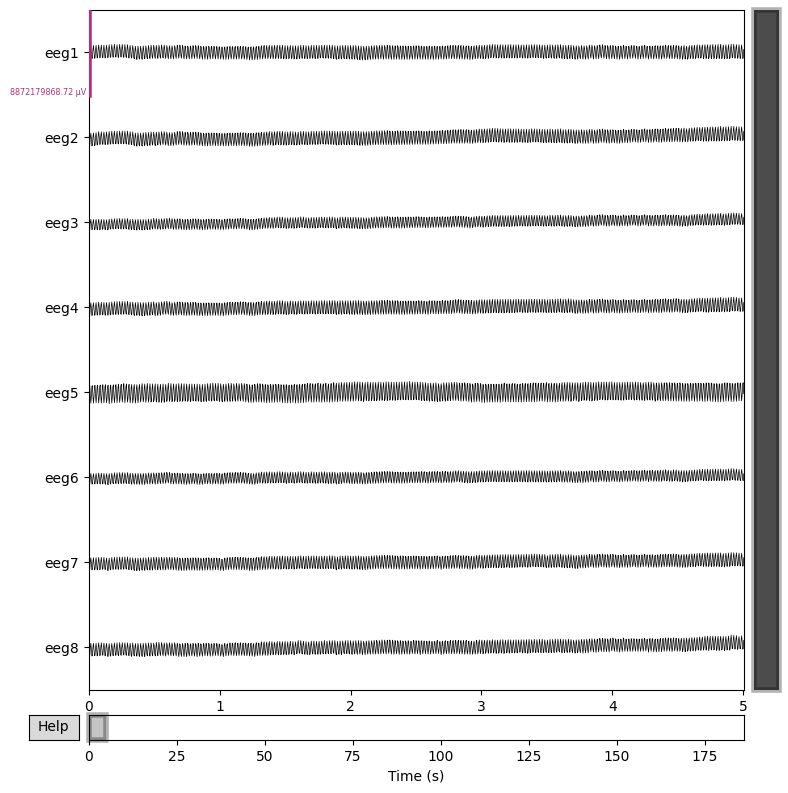

In [18]:
ch_names = ['eeg1', 'eeg2', 'eeg3', 'eeg4', 'eeg5', 'eeg6', 'eeg7', 'eeg8']
raw = mne.io.RawArray(data, info)
mne.viz.plot_raw(raw, title='Data from arrays', n_channels=8,duration=5,scalings='auto')
# raw.plot(n_channels=8, scalings='auto', title='Data from arrays')